# Multivariate linear regression example with boston house price

### we solve multivariate linear regression problem with two methods. one is a well-known method called gradient descent method, another one is normal equation

## 1. full batch gradient descent method

## 1-1. Selection of 4 features from data
### we select 4 features from boston house price dataset and train linear regression model with multi variables

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


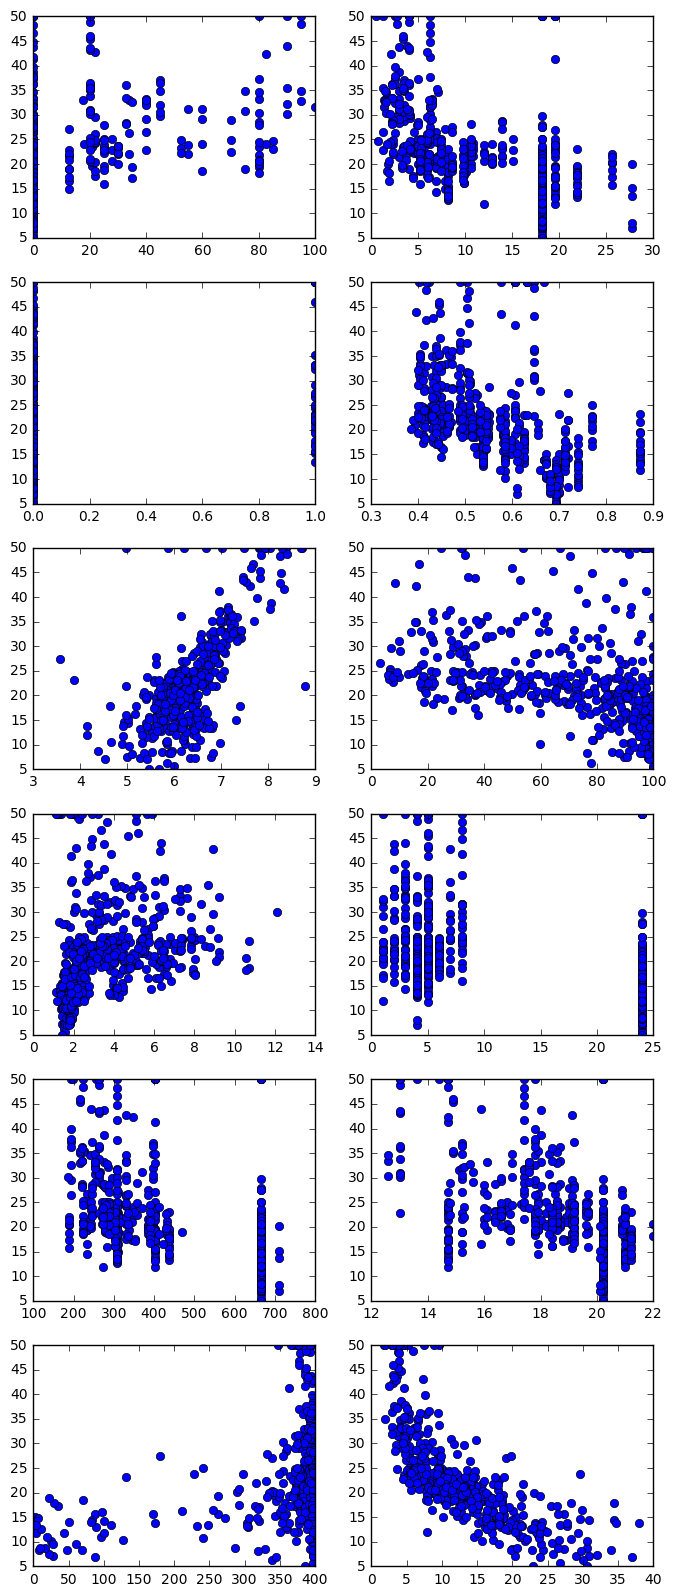

In [3]:
fig = plt.figure(figsize=(8, 20))
for i in range(1, 13):
    fig.add_subplot(6, 2, i).plot(boston.data[:, i], boston.target, 'bo')

### Among 13 features of boston.data, we selected 4 features(2, 4, 5, 6-th feature)

## 1-2. feature scaling

In [4]:
def feature_scaling(x):
    #scaling and mean shifting
    mean = np.mean(x)
    std = np.std(x)
    return list(map( lambda x : (x-mean)/(std) ,x))
    

In [5]:
data = list(map(lambda x : feature_scaling(x), [boston.data[:, 2], boston.data[:, 4], boston.data[:, 5], boston.data[:, 6]]))
data = np.array(data)

In [6]:
data.shape

(4, 506)

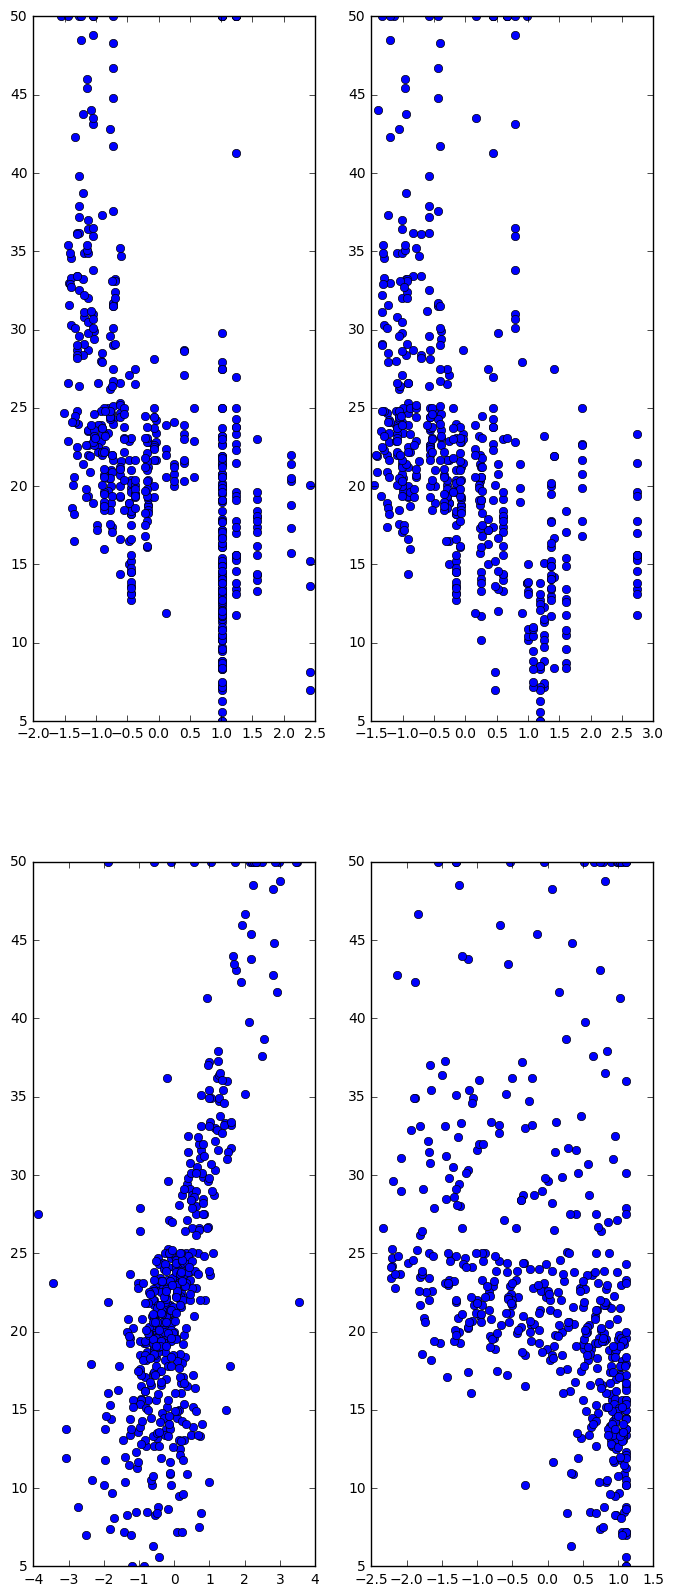

In [7]:
fig = plt.figure(figsize=(8, 20))
for i in range(0, 4):
    fig.add_subplot(2, 2, i+1).plot(data[i], boston.target, 'bo')
plt.show()

## 1-3. training multivariate linear regression
### by using gradient descent method to find optimal parameters

In [12]:
data

array([[-1.2879095 , -0.59338101, -0.59338101, ...,  0.11573841,
         0.11573841,  0.11573841],
       [-0.14421743, -0.74026221, -0.74026221, ...,  0.15812412,
         0.15812412,  0.15812412],
       [ 0.41367189,  0.19427445,  1.28271368, ...,  0.98496002,
         0.72567214, -0.36276709],
       [-0.12001342,  0.36716642, -0.26581176, ...,  0.79744934,
         0.73699637,  0.43473151],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [9]:
data = np.append(data, np.ones([1, len(data[0])]), axis = 0)
data.shape

(5, 506)

In [9]:
data[4][0:10] #for bias

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
num_theta = len(data)
gd_theta = []
for i in range(num_theta):
    gd_theta.append(np.random.rand())

In [14]:
print('parameters :', gd_theta)

parameters : [0.29463220947935775, 0.11766353779665117, 0.8679091000392063, 0.8193179322704002, 0.15233663896845018]


### hyperparameters

In [15]:
learning_rate = 0.01
iteration = 4000

In [16]:
data.shape

(5, 506)

In [17]:
data

array([[-1.2879095 , -0.59338101, -0.59338101, ...,  0.11573841,
         0.11573841,  0.11573841],
       [-0.14421743, -0.74026221, -0.74026221, ...,  0.15812412,
         0.15812412,  0.15812412],
       [ 0.41367189,  0.19427445,  1.28271368, ...,  0.98496002,
         0.72567214, -0.36276709],
       [-0.12001342,  0.36716642, -0.26581176, ...,  0.79744934,
         0.73699637,  0.43473151],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [19]:
gd_theta

[0.29463220947935775,
 0.11766353779665117,
 0.8679091000392063,
 0.8193179322704002,
 0.15233663896845018]

In [14]:
def loss(theta, data):
    tmp = np.dot(np.transpose(data), theta) - boston.target
    square_tmp = np.dot(np.transpose(tmp), tmp)
    loss = (0.5)*(1/len(data[0]))*square_tmp
    return loss

In [20]:
tmp = np.dot(np.transpose(data), gd_theta) - boston.target

In [23]:
np.dot(tmp, tmp)

295939.10633017193

gradient function calculates partial derivatives of theta to cost function J
$$\frac{\partial J(\theta)}{\partial(\theta)} = \sum(\theta^{T}x^{(i)} - y^{(i)})x^{(i)}   $$ 
                            
                            this is partial derivatives of MSE for regression

In [15]:
def gradient(theta, data):
    partial_derivative = np.dot(np.dot(np.transpose(data), theta) - boston.target, np.transpose(data))
    return partial_derivative

In [16]:
def update(theta, data, learning_rate):
    return theta - learning_rate*(1/len(data[0]))*gradient(theta, data)

In [17]:
for i in range(iteration):
    print(loss(gd_theta, data))
    gd_theta = update(gd_theta, data, learning_rate)

288.00575820962206
282.1264535681681
276.39225276756554
270.79880581524844
265.34192485181813
260.01757702836994
254.82187772630522
249.75108410246685
244.80158894332334
239.96991481274415
235.25270847870274
230.64673560498704
226.14887569470608
221.75611727305306
217.46555329742193
213.27437678358075
209.17987663717707
205.17943368039582
201.27051686410647
197.45067965632614
193.71755659829032
190.06886001986442
186.50237690644627
183.01596590990945
179.6075544965119
176.27513622505225
173.01676814889726
169.83056833582293
166.71471349991975
163.66743674010127
160.6870253800296
157.77181890453477
154.9202069878497
152.13062760922008
149.40156525166958
146.731549179914
144.1191517936178
141.56298705237768
139.06170896899948
136.61401016780403
134.21862050486305
131.87430574722123
129.57986630830328
127.33413603685058
125.13598105685747
122.98429865610893
120.87801622103582
118.81609021571984
116.79750520298714
114.82127290563001
112.88643130589534
110.99204378146837
109.13719827626824


19.10156999360856
19.101569444062143
19.10156889700265
19.10156835241839
19.101567810297684
19.101567270628916
19.101566733400585
19.101566198601166
19.10156566621928
19.10156513624352
19.10156460866259
19.101564083465252
19.1015635606403
19.1015630401766
19.101562522063077
19.1015620062887
19.101561492842492
19.101560981713558
19.101560472891016
19.101559966364082
19.101559462121998
19.10155896015406
19.101558460449642
19.10155796299815
19.10155746778905
19.10155697481184
19.10155648405613
19.10155599551149
19.10155550916764
19.101555025014285
19.1015545430412
19.101554063238225
19.101553585595212
19.101553110102127
19.101552636748924
19.101552165525636
19.101551696422344
19.10155122942918
19.101550764536313
19.10155030173397
19.101549841012428
19.101549382362
19.101548925773063
19.101548471236043
19.101548018741394
19.101547568279624
19.10154711984131
19.101546673417047
19.101546228997464
19.1015457865733
19.101545346135268
19.101544907674167
19.101544471180844
19.101544036646157
19.

19.101445847558253
19.101445846839297
19.10144584612339
19.101445845410527
19.101445844700702
19.101445843993886
19.101445843290076
19.101445842589257
19.101445841891422
19.101445841196547
19.10144584050463
19.10144583981566
19.101445839129614
19.101445838446487
19.101445837766256
19.101445837088924
19.101445836414463
19.101445835742883
19.101445835074152
19.10144583440827
19.1014458337452
19.101445833084973
19.10144583242753
19.101445831772892
19.10144583112104
19.101445830471956
19.101445829825632
19.101445829182055
19.101445828541213
19.101445827903085
19.101445827267685
19.101445826634983
19.10144582600497
19.10144582537764
19.101445824752957
19.101445824130952
19.10144582351158
19.101445822894846
19.10144582228072
19.10144582166922
19.10144582106031
19.101445820453996
19.101445819850248
19.101445819249086
19.101445818650458
19.10144581805439
19.101445817460842
19.10144581686983
19.101445816281323
19.101445815695314
19.101445815111816
19.10144581453078
19.101445813952218
19.1014458

### final parameters you get

In [18]:
gd_theta

array([-1.17540944, -0.76179395,  5.49970111, -0.82696417, 22.53280632])

### pred and ground truth

In [19]:
for i in range(20):
    print('pred :', round(np.dot( np.transpose(gd_theta), data[:, i]), 2 ), "    ", 'ground truth : ', boston.target[i])

pred : 26.53      ground truth :  24.0
pred : 24.56      ground truth :  21.6
pred : 31.07      ground truth :  34.7
pred : 30.96      ground truth :  33.4
pred : 31.88      ground truth :  36.2
pred : 26.13      ground truth :  28.7
pred : 21.22      ground truth :  22.9
pred : 21.6      ground truth :  27.1
pred : 17.25      ground truth :  16.5
pred : 20.59      ground truth :  18.9
pred : 23.26      ground truth :  15.0
pred : 20.71      ground truth :  18.9
pred : 21.06      ground truth :  21.7
pred : 20.73      ground truth :  20.4
pred : 21.21      ground truth :  18.2
pred : 19.98      ground truth :  19.9
pred : 21.57      ground truth :  23.1
pred : 20.46      ground truth :  17.5
pred : 17.6      ground truth :  20.2
pred : 18.76      ground truth :  18.2


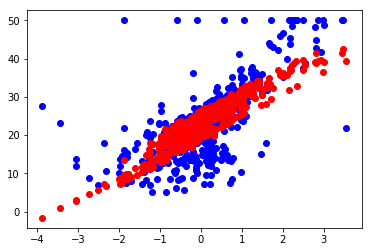

In [20]:
plt.plot(data[2], boston.target, 'bo')
plt.plot(data[2], np.dot( np.transpose(gd_theta), data), 'ro' )
plt.show()

# 2. Normal equation

## by normal equation, parameter theta is $$\theta = (X^TX)^{-1}X^Ty$$

- Concept

  One of way to get optimal is gradient descent method we learned earlier. This way is getting derivatives of parameters from cost function and update parameters iteratively. 

  Let's discuss a second way called Normal equation. It's no more to calculate optimal parameter iteratively. we will minimize the cost function explicitly without iterative algorithm.

- getting the formula

  we'd like to minimize the least-square cost: $$J(\theta_0, \theta_1, \cdots, \theta_n) = \frac{1}{2m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})^2$$

  and we can write hypothesis $$h_\theta(x) = \theta^Tx$$

  When this is summed over all samples, we can dip further into matrix notation. We'll define the "design matrix" X (uppercase X) as a matrix of m rows, in which each row is the i-th sample (the vector ![<math>](http://eli.thegreenplace.net/images/math/233014006c0adbee71ec71ba3a70f22ad1b906a1.png)). With this, we can rewrite the least-squares cost as following, replacing the explicit sum by matrix multiplication:
  $$
  J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y) \\
  J(\theta) = ( (X\theta)^T -y^T )(X\theta - y) = (\theta^TX^TX\theta -y^TX\theta -\theta^TX^Ty +y^Ty) \\
  = \theta^TX^TX\theta -2(X\theta)^Ty + y^Ty
  $$
  So we derive by each component of the vector, and then combine the resulting derivatives into a vector again. The result is:
  $$
  \frac{\partial J(\theta)}{\partial\theta} = 2X^TX\theta - 2X^Ty = 0 \\
  \text{or : } X^TX\theta = X^Ty \\
  \therefore \theta = (X^TX)^{-1}X^Ty
  $$
  which this is normal equation.

- Pros and Cons in contrast to Gradient Descent method

  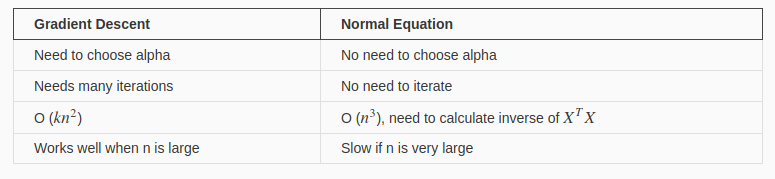


- references

  - https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression
  - https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution
  - https://stackoverflow.com/questions/18191890/why-gradient-descent-when-we-can-solve-linear-regression-analytically
  - https://www.coursera.org/learn/machine-learning/discussions/weeks/2/threads/6_bIYDt1EeaVABKtWz_zNw


In [21]:
inv_XT_X = np.linalg.inv( np.dot(data, np.transpose(data)) )

In [22]:
ne_theta = np.dot (np.dot(inv_XT_X, data),  np.transpose(boston.target))

In [23]:
ne_theta

array([-1.17545203, -0.76173207,  5.49969633, -0.82698829, 22.53280632])

In [24]:
gd_theta

array([-1.17540944, -0.76179395,  5.49970111, -0.82696417, 22.53280632])

# Therefore Normal equation's optimal parameters are almost same as gradient descent method's those, when the problem's hypothesis is liear model